### What are Observations and Actions
We will use the `process_recording` function, to extract and structure our `sample_first_jump`.

The function returns three things: `observation`, `observation_2d`, and `actions`.

#### Observations
This is a list of numbers that describe what the agent "sees" during the game. 
Some are normalized, meaning that they'll be ranging from 0.0 to 1.0.

Here's how it's structured:
| Indexes | What is It | Description |
|-------|------|-------------|
| `obs[0]` | distance **(normalized)** | Tells you how far you are from the end goal |
| `obs[1] and obs[2]` | direction **(normalized)** | Tells you where the goal is relative to your position |
| `obs[3] and obs[4]` | velocity **(normalized)** | Tells you how fast you are moving |
| `obs[5:37]` | sensors **(normalized)** | Tells you how far you are from a thing you can collide with |
| `obs[37:69]` | collision-types | Tells you the type of object you'll be colliding with |

<br>

<div style="display: flex; align-items: center;">
    <img src="../docs/DragonJump/sensor_notation.png" width="420" height="420">
    <div style="margin-left: 20px;">
        This image shows you how the sensors are positioned.
        The numbered sensors (0-31) detect obstacles in different directions around the player. <br> <br>
        Each sensor returns a normalized distance value (0-1) indicating how close the nearest obstacle is in that direction.
    </div>
</div>

#### 2D Observations
👉 This is a list of images that describe what the game looked like. \
👉 These images are of shape 32 x 32 x 3 (width x height x color_channels). \
👉 The images are smaller and pixelated such that there will be little to no latency when the game plays. The larger the images, the longer it will take for the game to send us the information.

### Actions
Is a dictionary that tells you what did the player do during the recording. It looks like:
{
    "jump": bool # whether the player jumped or not during that time in the game
}

In [1]:
# Here we're importing the necessary libraries

import sys
sys.path.append('../')

import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.processing import process_recording

In [2]:
# Let's load the sample recording of a user finishing the game

recording_path = "../data/sample_first_jump.json"
observations, observations_2d, actions = process_recording(recording_path)

In [3]:
# Keep only the observations where the player jumped

relevant_obs, relevant_obs_2d, relevant_actions = [], [], []
for observation, observation_2d, action in zip(observations, observations_2d, actions):
    if action["jump"] == True:
        relevant_obs.append(observation)
        relevant_obs_2d.append(observation_2d)
        relevant_actions.append(action)

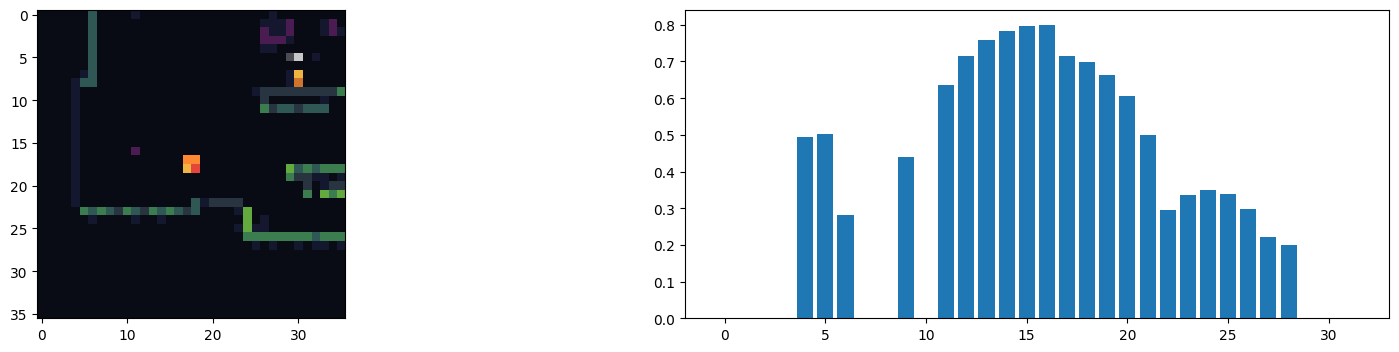

In [4]:
# Let's look at a random sample

# pick a random sample
random_index = random.choice(range(len(relevant_obs)))
obs = relevant_obs[random_index]
obs_2d = relevant_obs_2d[random_index]
actions = relevant_actions[random_index]

# split the observation into the different components
distance, goal_x, goal_y, velocity_x, velocity_y = obs[:5]
sensors = obs[5:37]
sensors_collision = obs[37:]

# plot the observation
fig, axs = plt.subplots(1, 2, figsize=(20, 4))
# plot the 2d observation
axs[0].imshow(obs_2d)
# plot bars for each of the sensors
axs[1].bar(np.arange(len(sensors)), sensors)
plt.show()

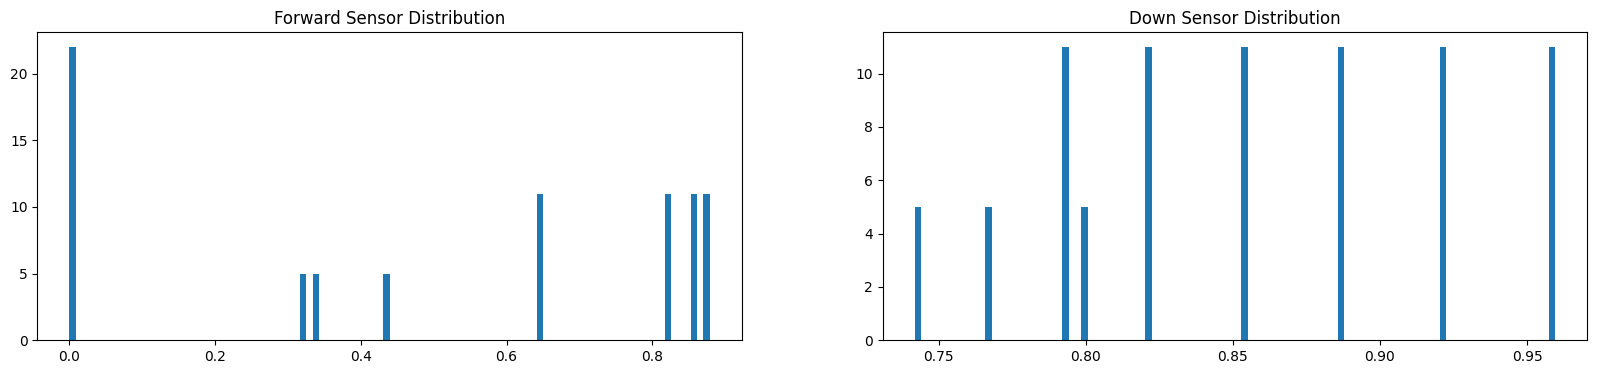

In [5]:
forward_sensor = []
down_sensor = []

for obs in relevant_obs:
    # split the observation into the different components
    distance, goal_x, goal_y, velocity_x, velocity_y = obs[:5]
    sensors = obs[5:37]
    sensors_collision = obs[37:]

    forward_sensor.append(sensors[9])
    down_sensor.append(sensors[16])

# plot the histograms
fig, axs = plt.subplots(1, 2, figsize=(20, 4))
axs[0].hist(forward_sensor, bins=100)
axs[0].set_title('Forward Sensor Distribution')
axs[1].hist(down_sensor, bins=100)
axs[1].set_title('Down Sensor Distribution')
plt.show()